In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sys
sys.path.append('../scripts')

df = pd.read_csv('../data/clean-data-FRA.csv')

cdf = df[['Cylindree (L)','Cylindres','Combinee (L/100 km)','Emissions de CO2 (g/km)']]
df = df.drop('Unnamed: 0', axis=1)
cdf.head()

,Cylindree (L),Cylindres,Combinee (L/100 km),Emissions de CO2 (g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


For the modeling, lets take some attributes off the clean dataframe to do some exploration with it, using only the main key data that could be related to fuel consumption:

- Cylindree (L)
- Cylindres
- Combinee (L/100 km)
- Emissions de CO2 (g/km)

In [97]:
cdf = df[['Cylindree (L)','Cylindres','Combinee (L/100 km)','Emissions de CO2 (g/km)']]
cdf.head(n=5)

,Cylindree (L),Cylindres,Combinee (L/100 km),Emissions de CO2 (g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, we train with the training set and test with the testing set. This seeks providing a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with. Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [98]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value y using linear approximation.

In [99]:
train.head(1)

,Cylindree (L),Cylindres,Combinee (L/100 km),Emissions de CO2 (g/km)
0,2.0,4,8.5,196


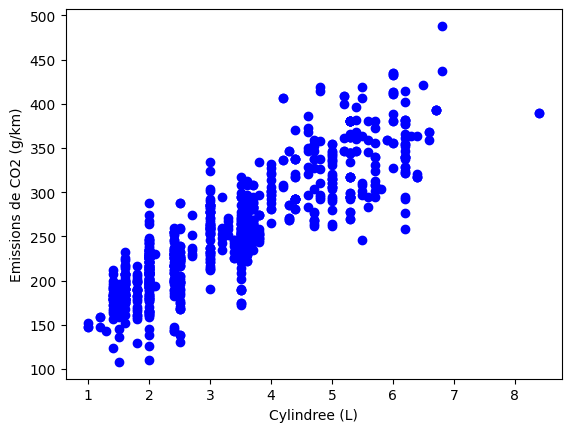

In [100]:
plt.scatter(train['Cylindree (L)'], train['Emissions de CO2 (g/km)'], color='b')
plt.xlabel('Cylindree (L)')
plt.ylabel('Emissions de CO2 (g/km)')
plt.show()

In [101]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(cdf[['Cylindree (L)']])
train_y = np.asanyarray(cdf[['Emissions de CO2 (g/km)']])
regr.fit(train_x, train_y)

print ('Coefficients: ', round(regr.coef_[0][0], 3))
print ('Intercept: ', round(regr.intercept_[0], 3))

Coefficients:  39.206
Intercept:  124.973


We use the ```sklearn``` to create a training model to model our data (```train``` dataframe), which we will later test comparing it to ```test``` dataframe.

Print the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.

Now if we print the fitting line...

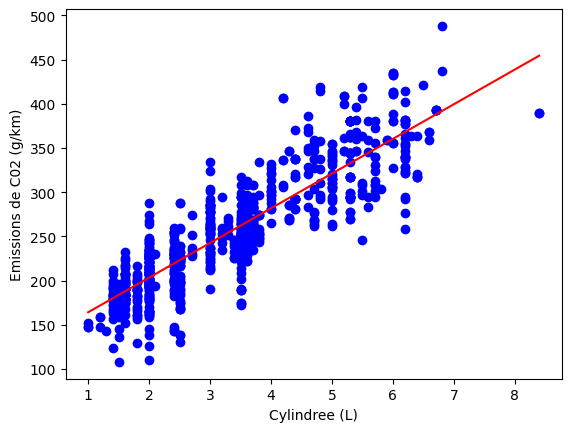

In [102]:
xrange = np.linspace(train_x.max(), train_x.min(), 100)
yrange = regr.coef_[0][0] * xrange + regr.intercept_[0]
plt.plot(xrange, yrange, color='r')
plt.scatter(train['Cylindree (L)'], train['Emissions de CO2 (g/km)'], color='b')
plt.xlabel('Cylindree (L)')
plt.ylabel('Emissions de C02 (g/km)')
plt.show()

What we get here is the plot of the line over the input data — in this case, the training one, and the model we created (the linear model, that is).

### Model Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
There are different model evaluation metrics:

*   Mean Absolute Error: it is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it's just average error.

*   Mean Squared Error (MSE): MSE is the mean of the squared error. It's more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE): it measures the difference between predicted values from a model and the actual observed values. It is obtained by taking the square root of the average of the squared residuals.

*   R-squared is not an error, but rather a popular metric to measure the performance of a regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits the data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

The choice of metric completely depends on the type of model, your data type, and domain
of knowledge.

In [103]:
# To check r-squared value, we use the r2_score function
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Cylindree (L)']])
test_y = np.asanyarray(test[['Emissions de CO2 (g/km)']])
test_y_ = regr.predict(test_x) # Uses last learnt .fit() model

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R-squared score: %.2f" % r2_score(test_y, test_y_) )

Mean absolute error: 22.16
Residual sum of squares (MSE): 865.16
R-squared score: 0.76


We obtained a mean absolute error of ~22 g/km — this means that the model, within the scope, does a decent job at predicting the expected emissions based on engine size, but its incomplete due to engine variability.

On the other side, the R-squared score shows a value of ~75 — this could be considered a good result, and we can expect the model to satisfy the expectations of other modeling.

In [104]:
regr = linear_model.LinearRegression() # Empty linear model
train_x = np.asanyarray(train[['Combinee (L/100 km)']])
train_y = np.asanyarray(train[['Emissions de CO2 (g/km)']])
fit = regr.fit(train_x, train_y)

test_x = np.asanyarray(test[['Combinee (L/100 km)']])
test_y = np.asanyarray(test[['Emissions de CO2 (g/km)']]) # Real
test_y_ = regr.predict(test_x) # Predict

# Mean absolute error
print(f"Mean absolute error: {np.mean(np.absolute(test_y_ - test_y))}")
# Residual sum of squares (MSE)
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
# R-square error
print("R-squared score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 18.78930567770812
Residual sum of squares (MSE): 642.58
R-squared score: 0.82


That was interesting, but we want to do more than that — since we want to make a model that describes what causes Emissions to be higher or lower, we must use a Multiple Regression Model.

## Multiple Regression Model 

As is the case with simple linear regression, multiple linear regression is a method of predicting a continuous variable. It uses multiple variables, called independent variables, or predictors, that best predict the value of the target variable, which is also called the dependent variable. In multiple linear regression, the target value, $y$, is a linear combination of independent variables, $x$.


In [105]:
import pylab as pl
%matplotlib inline

The model works quite similar to the case before, but in this case, the fit is made with three variables instead of one as we did before, since in reality, there are multiple variables that impact the CO2emission. Since we want to know what affects Emissions level, multiple linear regression is predicting ```Emissions de CO2``` using the features ```Combinee (L/100)```, ```Cylindree (L)``` and ```Cylindres``` of cars.

In [106]:
regr_line = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Combinee (L/100 km)', 'Cylindree (L)', 'Cylindres']])
train_y = np.asanyarray(train['Emissions de CO2 (g/km)'])
fit = regr_line.fit(train_x, train_y)

print('Coefficients:', regr_line.coef_)

Coefficients: [ 9.42159342 10.09923177  8.40693584]


In [107]:
test_x = np.asanyarray(test[['Combinee (L/100 km)', 'Cylindree (L)', 'Cylindres']])
test_y = np.asanyarray(test[['Emissions de CO2 (g/km)']])
y_hat= regr_line.predict(test_x)

print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_line.score(test_x, test_y))

Mean Squared Error (MSE) : 6585.25
Variance score: 0.86


As we can see, the variance score has been considerably increased compared to the previous one seen in the single regression model — this is to be expected, since more variables related to emissions give a better prediction of what these will be.

We can however check if the MSE would be lower by using other values, like Highway and City fuel consumption. This way we can try to get a more predictive model that better explains our data.

In [108]:
df.head(1)

,Annee modele,Marque,Modele,Categorie de vehicule,Cylindree (L),Cylindres,Transmission,Type de carburant,Ville (L/100 km),Route (L/100 km),Combinee (L/100 km),Combinee (mi/gal),Emissions de CO2 (g/km),Indice de CO2,Indice de smog
0,2014,Acura,ILX,Compacte,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,s.o.,s.o.


In [109]:
cdf = df[['Cylindree (L)','Cylindres','Ville (L/100 km)','Route (L/100 km)','Emissions de CO2 (g/km)']]

mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

# First we create an empty linear regression model
regr_line = linear_model.LinearRegression()
# We create training data
train_x = np.asanyarray(train[['Cylindree (L)','Cylindres','Ville (L/100 km)','Route (L/100 km)']])
train_y = np.asanyarray(train['Emissions de CO2 (g/km)'])
# Then, we fit it onto the model
fit = regr_line.fit(train_x, train_y)

# Now, having the model created, we can get the data from the test database
test_x = np.asanyarray(test[['Cylindree (L)','Cylindres','Ville (L/100 km)','Route (L/100 km)']])
test_y = np.asanyarray(test['Emissions de CO2 (g/km)'])
y_hat = regr_line.predict(test_x)

print('Coefficients:', regr_line.coef_)
print('MSE:', np.mean((y_hat - test_y) ** 2))
print('R-square (Variance explained by model):', round(regr_line.score(test_x, test_y), 3))

Coefficients: [9.97594682 7.45149938 5.79271897 4.2322517 ]
MSE: 469.33897368342514
R-square (Variance explained by model): 0.889


Even though not by much, the addition of those two extra variables — city and highway fuel consumption — has improved how much the model can predict emissions up to 0.889, which is a very high value by itself already.